# Chapter 3 - A Tour of Machine Learning Classifiers Using Scikit-Learn
scikit - learn 모듈을 활용해서 학습하기

<br></br>
## 1 Perceptron 알고리즘 분석
by scikit-learn

### 01 Import Data

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris.data.shape)
iris.data[:5]

(150, 4)


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [2]:
X = iris.data[:, [2, 3]]
X[:5]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

In [3]:
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### 02 데이터 전처리
https://brunch.co.kr/@rapaellee/4

Standard (평균화),  Normalization (정규화)

In [4]:
# 학습 데이터 70%,  테스트 데이터 30% 분리
# X_train, X_test 
# y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
# Normalization (정규화)
# 수식 : (요소값 - 최소값) / (최대값 - 최소값)
# 설명 : 데이터를 0과 1 사이의 값으로, 단위가 다른 데이터간 비교
from sklearn.preprocessing import StandardScaler, Normalizer

sn = Normalizer()
sn.fit(X_train)
X_train_std = sn.transform(X_train)
X_train_std[:5]

array([[ 0.96152395,  0.27472113],
       [ 0.95039713,  0.31103906],
       [ 0.91578821,  0.4016615 ],
       [ 0.95782629,  0.28734789],
       [ 0.95506414,  0.29639921]])

In [6]:
# Standard (평균화)
# 수식 : (요소값 - 평균) / 표준편차
# 설명 : 0 ~ 100의 값으로 변환, 동질 데이터 단위가 너무 크거나 작을 떄

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938]])

In [7]:
X_test_std = sc.transform(X_test)
X_test_std[:5]

array([[ 0.70793846,  1.50872803],
       [ 0.09545238, -0.29145882],
       [-1.35224199, -1.32013702],
       [ 1.37610509,  0.73721938],
       [-1.29656144, -1.32013702]])

### 03 Perceptron Training
perceptron 알고리즘 Train
1. eta : Learning rate         
2. n-iter : Number of Iterator (train을 반복할 epoch 횟수)
3. random_state : epoch 실시 후 훈련데이터 초기화를 위한 re-sampling 

In [8]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [9]:
# 오분류율 계산 
# y 와 ^y 가 다른 갯수를 출력
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [10]:
# Test 데이터에 대한 분류 정확도 Accuracy 계산
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


### 04 Visualization
len(np.unique(y) 의 갯수만큼 분류를 한다

In [11]:
# 모델의 결정역을 시각화
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

In [12]:
# 소수점 데이터를 정수로 바꾸기
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

In [13]:
# 결정영역 시각화
# len(np.unique(y) 의 갯수만큼 분류를 한다.
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')     # setup marker generator and color map
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # ppn 알고리즘으로 예측값 계산하기
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)                         # 예측값을 위의 영역 내부에 그리기
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)  # contour : 외곽선 그리기
    plt.xlim(xx1.min(), xx1.max())  # x축의 영역을 정의
    plt.ylim(xx2.min(), xx2.max())  # y축의 영역을 정의

    # 원본데이터  (X , taget y ) scatter
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],  # X[ 윈본데이터] 의 np.unique(y) 와 일치하는 값을 하나씩 scatter 
                    y=X[y == cl, 1],  # 
                    alpha=0.6,  c=cmap(idx), edgecolor='black',
                    marker=markers[idx],  label=cl)
    # test 데이터 출력
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],       X_test[:, 1],
                    c='',   alpha=1.0,  edgecolor='black', linewidths=1,
                    marker='o',  s=95,  label='test set')

In [14]:
X_combined_std = np.vstack((X_train_std, X_test_std))
print(X_combined_std.shape)
X_combined_std[:3]

(150, 2)


array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ]])

In [15]:
y_combined = np.hstack((y_train, y_test))
print(y_combined.shape)
y_combined[:5]

(150,)


array([1, 2, 2, 2, 2])

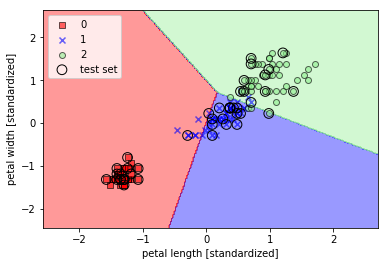

In [16]:
plot_decision_regions(X = X_combined_std, y = y_combined,
                      classifier = ppn, test_idx = range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [17]:
# 한계:
# perceptron 의 선형분리만 가능해서, 완벽하게 구분된 영역을 설정하긴 어렵다
# 선형으로 분리가 안되면, 선형으로 절대 수렴하지 않는다.

<br></br>
## 2 Logistic Regression 알고리즘 분석
by logit (p (y=1 | x)) 조건부 확률의 계산  : sigmoid 함수
1. 분류 레이블 예측
2. 분류 확률(%)을 추정 (조건부 확률)

<img src= "https://sebastianraschka.com/images/faq/logisticregr-neuralnet/schematic.png" align="left" >

In [18]:
# Hypothesis (cost/loss),  
# Activation(sigmoid),  
# unit step ( one-hot encoding : 단위단계 함수) : 0, 1

In [19]:
# odd ration
# p / (1-p) : 긍정 이벤트의 확률 ()

# logit 함수 
# odd ration 을 log() 화 한 함수 
# logit(p) = log ( p / (1-p) )

# logistic 함수
# x 값이 주어졌을 떄, 분류에 '특정샘플'이 속할 조건부 확률
# logit (p (y=1 | x)) = w0x0 + w1x1..... = sigma(wixi) = wTx
# 주로 Sigmoid 함수로 부른다
# sigmoid() = 1 / 1 + e-z

### 01 Sigmoid 함수
y = 1을 충족할, 조건부 확률의 log() 함수

In [20]:
# sigmoid 함수를 정의 
# logit (p (y=1 | x)) = w0x0 + w1x1.....
# np.exp() : e 지수값
import numpy as np

def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

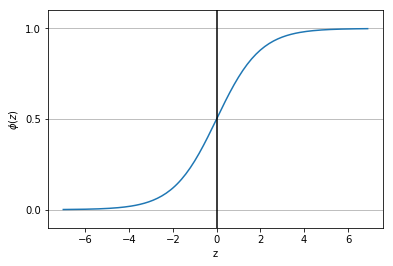

In [21]:
import matplotlib.pyplot as plt
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 범위와 간격, 그리드를 활성화
plt.ylim(-0.1, 1.1)
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

### 02 Logistic 비용함수의 가중치 학습
파라미터의 활용

In [22]:
# Mean Square Error 
# 편차 제곱합 비용함수 : ADliner 에서는 'w'를 학습하기 위해서 이를 최소화 했었다 (기억은 잘안다나 ㅜㅜ...)

In [23]:
# Likelihood : 우도값
# 어떤 사건이 발생할 확률값
# 개별사건 : 가능도              ex) 내일 비가 올 확률
# 연속사건 : '확률밀도함수(Probability Density Function, PDF)' 상의 값 

In [24]:
# Gradient Descent를 활용한 cost 확률을 계산
def cost_1(z): 
    return - np.log(sigmoid(z))      # y = 1 일 떄 
def cost_0(z): 
    return - np.log(1 - sigmoid(z))  # y = 0 일 떄

In [25]:
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
#plt.plot(z, phi_z)

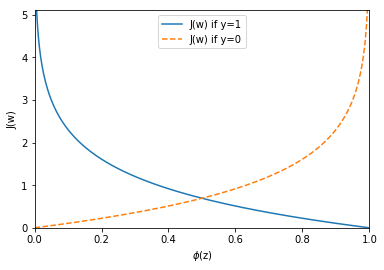

In [26]:
# 샘플데이터에 대한 cost 함수 J(w) : y=1
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

# 샘플데이터에 대한 cost 함수  J(w) : y=0
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1) ;      plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')  ;plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

In [27]:
# y = 1 을 예측한 경우, cost 가 감소한다
# y = 0 을 예측한 경우, cost 는 증가한다

# liklyhood 함수를 활용하면
# y = 값이 정확히 예측되었는지를 확인할 수 있다.

<br></br>
## 3 SVM
ADliner 함수를 j(w) 로 대체가능

### 01 reviewing by  scikit-learn
같은 모델들을 scikit-learn을 활용해서 구현하기

In [28]:
# Logistic Regression 회귀분석
# C=1000.0 : 정규화 강도 조절 값  
# 오분류 오차에 대한 벌칙값 - 크면 이를 근거로 데이터를 정규화 한다.

# C 값이 작을 떄 - 손실함수값이 작다  - row 만으로도 쓸만하다         : row 데이터의 정규화 강하다
# C 값이 클 떄  - 손실함수값이 커진다 - row 를 정규화할 필요성이 크다  : row 데이터의 정규화 강도 약하다 

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [30]:
# import 데이터
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# train, test 데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# standard (평균화) 전처리 : 이질적 데이터를 평균과 분산값으로 변환
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

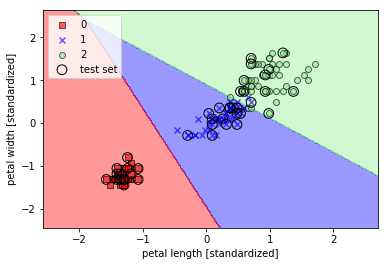

In [31]:
# 분석 결과를 시각화
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [32]:
# Setosa 샘플이 분류에 속할 확률을 계산
# lr.predict_proba(X_test_std[0,:])
# Data has a single feature : X.reshape(-1, 1)  # single feature
# Contains a single sample  : X.reshape(1, -1)  # all data

lr.predict_proba(X_test_std[0, :].reshape(1, -1))  # 출력 형태를 지정

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### 02 Overfitting
Normalization (정규화) : bias - 분산 간의 균형점을 찾기 용이하도록, 모델의 복잡도를 재조정

다중공선성(feature간의 높은 상관성) 을 처리하고, 잡음을 filtering 한다

1. feature scaling 이 중요 : 모든 feature 가 비교가능한 scale 에 있는지를 확인
2. 정규화 파라미터를 활용  : J(w) 함수에 + 정규화 항 만 더한다 
 - 정규화 항을 크게 : 정규화 강도를 증가
 - 정규화 항을 작게 : 정규화 강도를 약하게

In [33]:
X_train_std[:5]

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938]])

In [34]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) ; params.append(10**c)

In [35]:
weights = np.array(weights)
weights.shape

(10, 2)

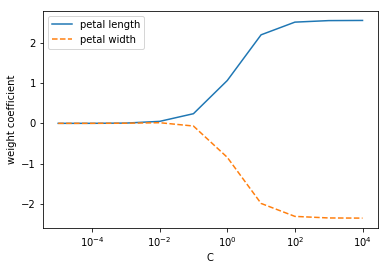

In [36]:
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient'); plt.xlabel('C')
plt.legend(loc='upper left')    ; plt.xscale('log')
plt.show()

In [37]:
# 정규화 값 인 'C'가 너무 크면 서로 어긋나버린다.

### 03 SVM 의 마진(Margin) 분류를 최대화 하기
Margin : hyper평면(결정경계) 으로 부터 데이터간 M.S.E 유클리드 거리 값
1. Logistic 회귀분석 : 데이터의 likelyhood를 최대화 알고리즘 (update가 쉬워서 실시간처리에 유용)
2. SVM : 결정경계(support Vector) 에 가까운 점들을 묶는 알고리즘

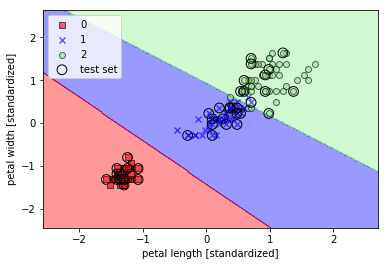

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [39]:
from sklearn.linear_model import  SGDClassifier
ppm = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

### 04 SVM 의 XOR 문제의 해결
비선형적인 문제를 손쉽게 해결가능한 Kernalized 에 유용

In [40]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor( X_xor[:, 0] > 0,
                        X_xor[:, 1] > 0 )
y_xor = np.where(y_xor, 1, -1)

In [41]:
X_xor[:5]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ]])

In [42]:
y_xor[:5]

array([-1, -1,  1,  1,  1])

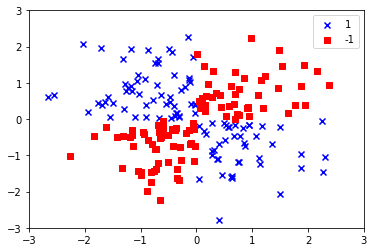

In [43]:
# y_xor 이 1을 갖는 데이터의 산포도
plt.scatter(X_xor[y_xor == 1, 0],  X_xor[y_xor == 1, 1],  c='b', marker='x', label='1')
# y_xor 이 -1을 갖는 데이터의 산포도
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3]);        plt.ylim([-3, 3])
plt.legend(loc='best');   plt.show()

In [44]:
# 2차원에서 분류가 어려운 모델의 경우....
# Radial Basis Function Kernal (= Gaussian Kernel) : Kernal trick 가우시안 커널 

# Gaussian Shere (평면 데이터의 입체감 부여)
# gamma=0.1 : Gaussian Shere 의 Cut-off 파라미터 
# (클수록 샘플에 영향이 크다 : 결정경계는 더 부드러워 진다)

from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=10.0 , random_state=0, gamma=0.1)
svm.fit(X_xor, y_xor) #train_std, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

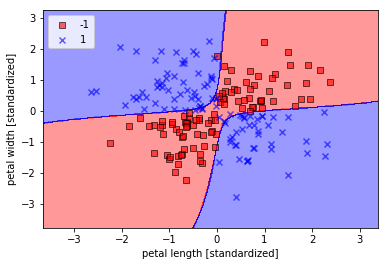

In [45]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 05. SVM 의 할용
Iris 데이터 

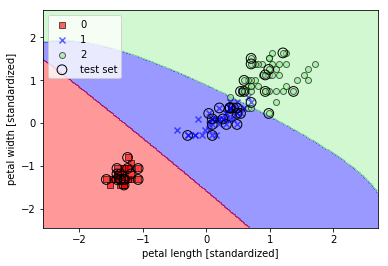

In [46]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]'); plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left');              plt.show()

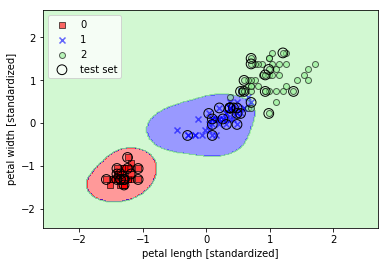

In [47]:
svm = SVC(kernel='rbf', random_state=0, gamma=6., C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]'); plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left');              plt.show()

<br></br>
## 4 Decision Tree
뿌리부터 시작해서, 가장 큰 information gain (IG)를 도출하는 feature 데이터를 분리
 1. IG값이 작은경우 - 상호 선호도가 높다
 2. IG값이 큰경우  - 상호 이질적이다.
 
Leaves(잎사귀들)이 순수해 질 때(IG가 작을때)까지, 분리과정을 반복한다.

Overfiting을 방지하기 위해서는, 나무의 최대깊이를 제한한다

### 01 IG 를 최대화SVM 의 할용
binary IG 분류기준
Gini index , Entropy , 분류오차 

In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# 불순도 측정모델을 정의
# Entropy 는 서로 상이한 극대값의 분류를 찾는다. (오분류 최소화) 
# so... Gini 와 Entropy는 유사한 결과가 도출

# 분류오차는 확률에 대한 변화로써 민감도가 낮다
# so... 가지치기에는 유용하지만, 의사결정나무를 성장하기 위해서는 부적합

In [50]:
def gini(p):    # Gini index 
    return p * (1 - p) + (1 - p) * (1 - (1 - p))            
def entropy(p): # Entropy
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p)) 
def error(p):   # 분류오차
    return 1 - np.max([p, 1 - p])                        

In [51]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

In [52]:
fig = plt.figure()
ax = plt.subplot(111)

# 불순도 값의 변화를 시각적으로 관찰하기
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
        ['Entropy', 'Entropy (scaled)','Gini Impurity', 'Misclassification Error'],
        ['-', '-', '--', '-.'],
        ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

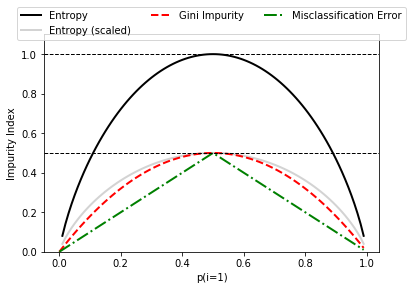

In [53]:
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1]); plt.xlabel('p(i=1)'); plt.ylabel('Impurity Index'); plt.show()

### 02 의사결정나무 만들기
feature 공간을 사격형으로 나눔으로써, 결정경계(support vector)를 생성한다

In [54]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree, test_idx=range(105, 150))

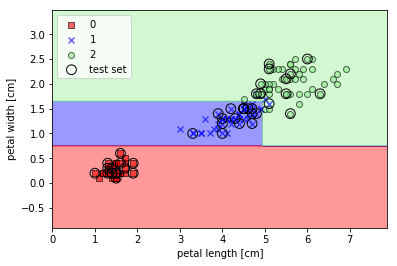

In [55]:
# 축 평형 결정경계(support vector)를 출력 
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [56]:
from sklearn.tree import export_graphviz , export

export_graphviz(tree, 
                out_file='tree.dot', 
                feature_names=['petal length', 'petal width'])

In [57]:
!dot -Tpng tree.dot -o tree.png
# ./tree.png

<img src="./tree.png" align='left' width='500'>

In [58]:
# 파이썬 내부 모듈을 통해서 Decision Tree를 구현하기
import pydotplus

# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

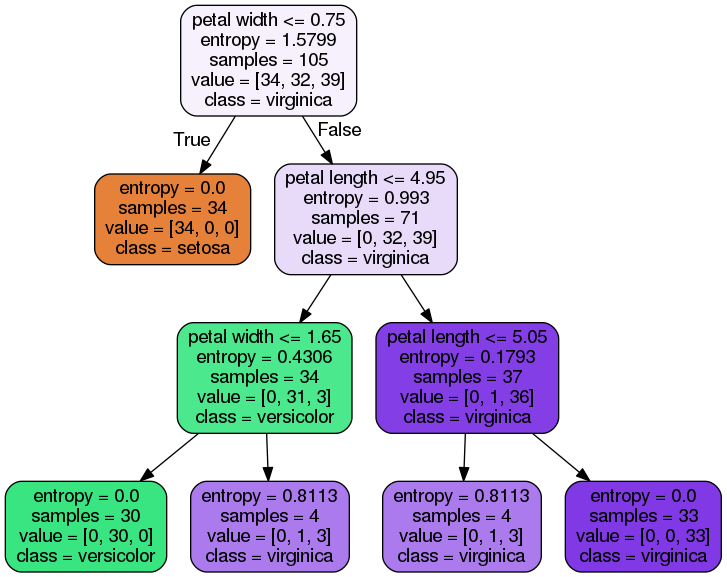

In [59]:
from IPython.display import Image
from IPython.display import display
import pydotplus
dot_data = export_graphviz(
            tree, out_file=None,
            feature_names=['petal length', 'petal width'],  
            class_names=['setosa', 'versicolor', 'virginica'],  
            filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

### 03 Random Forest
앙상블 알고리즘 : 약한 학습알고리즘을 결합해서 더 강한모델을 만드는 것 (잡음에는 강하다)

'n개'의 'bootstrap' 을 그린다

'개별 bootstrap' 의 'sample'로 부터 나무를 키운다 
 1. d 개의 피신처를 임의로 선택
 2. 목적함수의 'IG를 최대화' 하는 'node 분리를 통해서 나무를 키운다

위 단계 'k번' 반복해, 여러개의 Decision Tree 를 키운다 ('k'만 정하면, 앙상블 과정의 잡음에는 강하다)

다수결의 원칙에 의해 각 나무의 예측을 합친다

In [60]:
# 랜덤포레스트 알고리즘 활성화
# n_estimators : 10개의 의사결정 나무로 부터 모델을 생성
# criterion    : node 의 분리기준으로 Entropy 를 기준
# n_jobs       : 분산연산 갯수
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=10,  random_state=1, n_jobs=4)

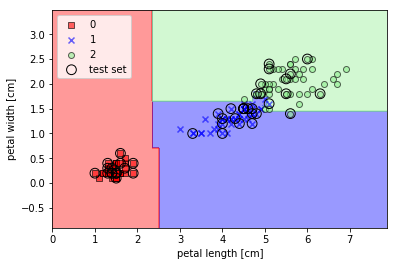

In [61]:
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

<br></br>
## 4 KNN
훈련 데이터로 부터, 학습함수 대신 데이터를 기억한다

<img src="https://i0.wp.com/arifuzzamanfaisal.com/wp-content/uploads/2017/05/knn.png" align='left' width=400>

In [62]:
# k에 대항하는 숫자와 매트릭을 선택
# 분류를 원하는 sample에 대한 k개(홀수)의 근접합 이웃(sample을 중심으로 하는 원형경계)을 찾는다
# k개 item들의 다수결 투표로 분류레이블을 할당한다. (새로운 데이터가 수집되는 즉시, 분류기가 결론을 도출)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# minkowski 유클리드 거리의 일반론
# p = 1 : 맨하턴 거리함수,  p = 2 : 유클리드 거리함수
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') 
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

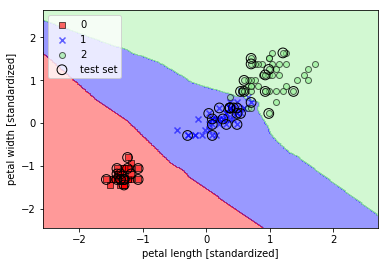

In [64]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left'); plt.show()

In [65]:
# 차원의 저주를 피하는 법

# Logistic 함수 : Overfiting을 피하기 위해, Data 를 Normalize , Standaize 를 한다
# Decision Tree, KNN : feature의 선택적 지정 , 차원축소 